Домашнее задание включает в себя 2 задачи:

Даны 3 колонки с данными: 'Name', 'Start Date' и 'End Date'. 
- 'Name' - уникальное название заявки, пришедшей в центр технической поддержки. 
- 'Start Date' - время поступления заявки. 
- 'End Date' - время обработки заявок.


Необходимо рассчитать еще одну колонку - 'Implementation time', показывающую количество рабочих часов (https://en.wikipedia.org/wiki/Business_hours), потраченных на обработку каждой заявки.
Рабочие часы начинаются в 08:00 и заканчиваются в 18:00. Рабочая неделя ПН-ПТ, есть праздники (РФ).

Пример (Даты в ISO):
```
Name	Start Date	End Date	Implementation time	Comment
1	2020-11-01T08:00:00	2020-11-01T18:00:00	0	Выходной
2	2020-11-01T08:00:00	2020-11-02T09:30:00	1.5	Выходной + 1.5 часа в ПН
3	2020-11-01T08:00:00	2020-11-05T19:00:00	24	Выходной + 8 ПН + 8 ВТ + СР - выходной + 8 ЧТ
```
И т.д.

Для задания необходимо:

- Самостоятельно сгенерировать случайные 
        'Name', 'Start Date' и 'End Date' при условии 01-01-2019 <= 'Start Date' <= 'End Date' < 01-01-2020 
        (N датасетов, где размер датасета 10^N, N < 8 - натуральное).
- По исходным данным построить гистограмму "сколько поступило и обработано заявок по месяцам".
- Построить график скорости работы вашей программы в зависимости от N.
- Написать тесты с пояснениями.

In [17]:
import pandas as pd
import datetime
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [365]:
def generate_year(freq='30'):
    
    russian_holidays = [
    '2019-01-01',
    '2019-01-02',
    '2019-01-03',
    '2019-01-04',
    '2019-01-05',
    '2019-01-06',
    '2019-01-07',
    '2019-01-08',
    '2019-02-23',
    '2019-02-24',
    '2019-03-08',
    '2019-03-09',
    '2019-03-10',
    '2019-05-01',
    '2019-05-02',
    '2019-05-03',
    '2019-05-04',
    '2019-05-05',
    '2019-05-09',
    '2019-05-10',
    '2019-05-11',
    '2019-05-12',
    '2019-06-12',
    '2019-11-04',
    ]

    russian_holidays = list(map(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').date(), russian_holidays))
    
    the_whole_year = pd.DataFrame(pd.date_range(start='2019-01-01', end='2020-01-02', freq=f'{freq}min', name='timestamp'))
    
    the_whole_year['is_holiday'] = the_whole_year['timestamp'].apply(lambda x: x.date()).isin(russian_holidays)
    the_whole_year['is_working_day'] = the_whole_year['timestamp'].apply(lambda x: x.weekday()).isin(range(5))
    the_whole_year['to_count'] = (~the_whole_year['is_holiday'])&the_whole_year['is_working_day']

    the_whole_year = the_whole_year[(the_whole_year['timestamp'].apply(lambda x: x.hour)<=18)& \
                                      (the_whole_year['timestamp'].apply(lambda x: x.hour)>=8)]
    
    return the_whole_year


In [367]:
def generate_tickets(n, times_len, freq):
    df = pd.DataFrame(columns=['name', 'start_time', 'end_time', 'implementation_time'])
    tickets = []
    for i in range(n):
        start=np.random.randint(start_len, times_len-1)
        end=np.random.randint(start+1, times_len)
        start_time = the_whole_year['timestamp'].iloc[start]
        end_time = the_whole_year['timestamp'].iloc[end]
        impl = end_time-start_time

        periods = len(the_whole_year[(the_whole_year['timestamp'].between(start_time, end_time))&
                   (the_whole_year['to_count'])]['timestamp'])
        
        tickets.append([i, start_time, end_time, periods*freq/60])
        
        
    df = pd.DataFrame(tickets, columns=['name', 'start_time', 'end_time', 'implementation_time'])
        
    return df
        

In [368]:
def draw_plot(tickets):
    tickets['start_month'] = tickets['start_time'].apply(lambda x: x.month)
    tickets['end_month'] = tickets['end_time'].apply(lambda x: x.month)
    ends = tickets[tickets['start_month']==tickets['end_month']]['start_month']
    starts = tickets['start_month']

    sns.histplot( starts, color="skyblue", bins=20)
    sns.histplot( ends, color="red", bins=20)
    return plt
    

In [371]:
perfomance.tail()

,n,perfomance_time
987,995,1.893005
988,996,1.886733
989,997,1.898387
990,998,2.020230
991,999,2.019597


/home/reeve/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


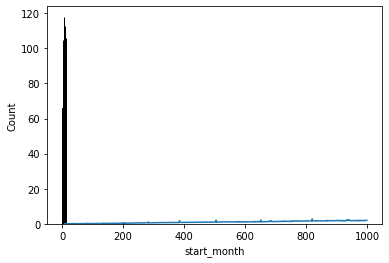

In [370]:
deltas = []
freq = 30
year = generate_year(freq)

for n in range(8, 1000):
    time1 = time.time()
    tickets = generate_tickets(n, len(the_whole_year), freq)
    plt = draw_plot(tickets)
    time2 = time.time()
    delta = time2-time1
    deltas.append([n, delta])
    
perfomance = pd.DataFrame(deltas, columns=['n', 'perfomance_time'])
sns.lineplot(perfomance.n, perfomance.perfomance_time)
plt.show()

/home/reeve/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


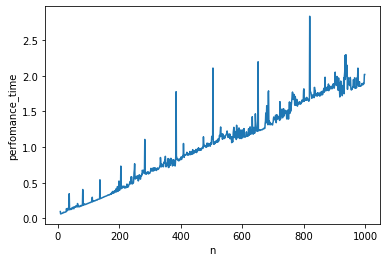

In [372]:
sns.lineplot(perfomance.n, perfomance.perfomance_time)
plt.show()

- По первой ДЗ с БД написать аналог на Pandas. 
- Сравнить производительность с запросами к БД (pd.read_csv, pd.read_sql и без pandas). 
- Результаты оформить в jupyter notebook.

In [1]:
import psycopg2
import logging
import requests
import csv
import pandas as pd
import nltk

"""Write a program which takes some string as an input
and performs search by title over movie database.
Search should work for partial match, be case insensitive and should
cover different word forms, like for "big heroes" input, "Big Hero 6"
movie should be found. For each found movie, display its title, main actor,
genres and imdb_score. Sort results by imdb_score."""

In [4]:
link = 'https://raw.githubusercontent.com/Godoy/imdb-5000-movie-dataset/master/data/movie_metadata.csv'
# list_of_movies = get_list_of_movies(link)

In [5]:
df = pd.read_csv(link)

In [29]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genres_stemmed,movie_stemmed
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,"[action, adventur, fantasi, sci-fi]",[avatar]
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,"[action, adventur, fantasi]","[pirat, of, the, caribbean, At, world, s, end]"
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,"[action, adventur, thriller]",[spectr]
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,"[action, thriller]","[the, dark, knight, rise]"
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,[documentari],"[star, war, episod, vii, the, forc, awaken]"


In [21]:
def clean_string(string):
    return re.sub('[^a-zA-Z0-9]+', ' ', string)

In [51]:
df['genres_stemmed'] = df['genres'].apply(lambda tokens: [stemmer.stem(token) for token in tokens.split('|')])
df['movie_stemmed'] = df['movie_title'].apply(lambda tokens: [stemmer.stem(token) for token in clean_string(tokens).strip().split(' ')])


In [23]:
import re

In [3]:
from nltk.stem import *

In [12]:
stemmer = PorterStemmer()

In [14]:
stemmer.stem('CARING')

'care'

In [ ]:
def pandas_fts(string):
    stemmer = = PorterStemmer()
    tokens = string.split(' ')
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens

In [ ]:
def get_movie_by_genre():
    pass

In [47]:
def get_movie_by_title(string, df):
    query = query = [stemmer.stem(token) for token in clean_string(string).strip().split(' ')]
    res = df[df['movie_stemmed'].apply(lambda tokens: sum([token in query for token in tokens])>0)]
    return res[['movie_title', 'actor_1_name', 'genres', 'imdb_score']]
    

In [49]:
def get_movie_by_genres(string, df):
    query = [stemmer.stem(token) for token in clean_string(string).strip().split(' ')]
    res = df[df['genres_stemmed'].apply(lambda tokens: sum([token in query for token in tokens])>0)]
    return res[['movie_title', 'actor_1_name', 'genres', 'imdb_score']]
    

In [50]:
get_movie_by_genres('comedy, adventure', df)

,movie_title,actor_1_name,genres,imdb_score
0,Avatar,CCH Pounder,Action|Adventure|Fantasy|Sci-Fi,7.9
1,Pirates of the Caribbean: At World's End,Johnny Depp,Action|Adventure|Fantasy,7.1
2,Spectre,Christoph Waltz,Action|Adventure|Thriller,6.8
5,John Carter,Daryl Sabara,Action|Adventure|Sci-Fi,6.6
6,Spider-Man 3,J.K. Simmons,Action|Adventure|Romance,6.2
...,...,...,...,...
5025,Pink Flamingos,Divine,Comedy|Crime|Horror,6.1
5031,Sanctuary; Quite a Conundrum,Julianna Pitt,Comedy|Horror|Thriller,5.4
5037,Newlyweds,Kerry Bishé,Comedy|Drama,6.4
5038,Signed Sealed Delivered,Eric Mabius,Comedy|Drama,7.7


In [48]:
get_movie_by_title('lord rings', df)

,movie_title,actor_1_name,genres,imdb_score
270,The Lord of the Rings: The Fellowship of the R...,Christopher Lee,Action|Adventure|Drama|Fantasy,8.8
339,The Lord of the Rings: The Return of the King,Orlando Bloom,Action|Adventure|Drama|Fantasy,8.9
340,The Lord of the Rings: The Two Towers,Christopher Lee,Action|Adventure|Drama|Fantasy,8.7
952,The Ring Two,Naomi Watts,Horror|Mystery,5.4
1170,Lord of War,Nicolas Cage,Crime|Drama|Thriller,7.6
1974,Lords of Dogtown,Heath Ledger,Biography|Drama|Sport,7.1
2968,The Postman Always Rings Twice,Anjelica Huston,Crime|Drama|Romance|Thriller,6.6
3320,Red Riding: In the Year of Our Lord 1974,Andrew Garfield,Crime|Drama|Mystery|Thriller,7.1
4022,Lords of London,Ray Winstone,Crime|Mystery|Thriller,3.1
4437,The Lords of Salem,Sid Haig,Drama|Fantasy|Horror|Thriller,5.1
